
## Lab20: Convolution
DS4400: Machine Learning (Rachlin Sp23)

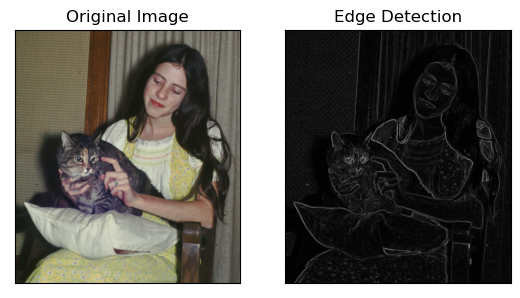

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image and convert to grayscale
img = cv2.imread('cat.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Sobel filter to detect edges - Gradient along x and y
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
edges = cv2.magnitude(sobelx, sobely)

# Display the original and edge-detected images
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Detection'), plt.xticks([]), plt.yticks([])
plt.show()


In [9]:
# Define some convolution filters
sobel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
edge = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
blur = np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]])
much_blur = np.ones((20, 20)) / 400
emboss = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])



In [10]:
# Load the image

import numpy as np
import imageio

# Load the color image as a numpy array
image = np.array(imageio.v2.imread('cat.png'))
type(img)
print(img.shape)

(1144, 1018, 3)


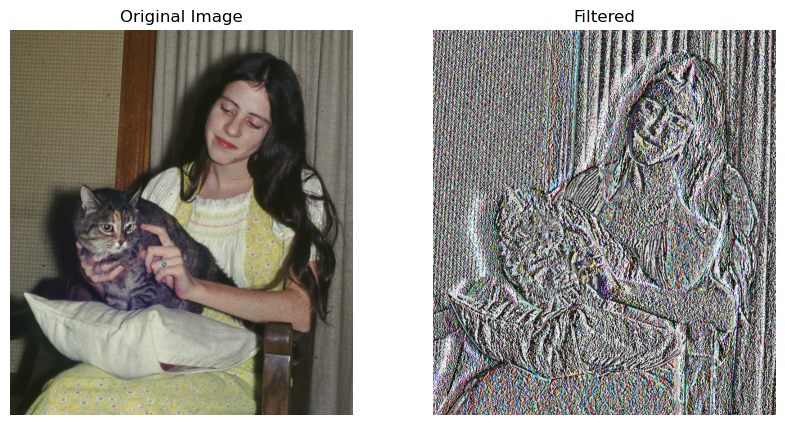

In [11]:
import scipy.ndimage as ndi # Multi-dimensional image processing


# Define the convolution kernel
kernel = sobel

# Apply convolution on each color channel separately
r = ndi.convolve(img[:,:,0], kernel)
g = ndi.convolve(img[:,:,1], kernel)
b = ndi.convolve(img[:,:,2], kernel)

# Combine the color channels back into an RGB image
rslt = np.stack([r, g, b], axis=2)

# Display the original and edge-detected images
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(rslt)
ax[1].set_title('Filtered')

ax[1].axis('off')
plt.show()